In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import nxviz as nv
from nxviz import MatrixPlot, ArcPlot, CircosPlot
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


# Load data

In [23]:
data = pd.read_csv("./processed_data/curated_gene_disease_associations_autism_grouped.csv", sep='\t')
genes_df = pd.read_csv("../raw_data/gene_associations.tsv", sep='\t')

In [24]:
genes_df.head(1)

,geneId,geneSymbol,DSI,DPI,PLI,protein_class_name,protein_class,NofDiseases,NofPmids
0,1,A1BG,0.7,0.538,4.991700e-09,Receptor,DTO_05007575,27,20


In [80]:
autism_df = data[data['autism_subtype_broad'] != 'Not Autism'].drop_duplicates()
autism_df.head()

,Unnamed: 0,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source,autism_subtype_broad
100,100,18,ABAT,0.639,0.276,A00,Autism Spectrum Disorder,disease,F03,Mental or Behavioral Dysfunction,0.31,1.0,2005.0,2005.0,1,0,CTD_human,Non-Syndromic Autism
326,326,36,ACADSB,0.752,0.241,A00,Autism Spectrum Disorder,disease,F03,Mental or Behavioral Dysfunction,0.30,NaN,2011.0,2011.0,1,0,CTD_human,Non-Syndromic Autism
371,371,40,ASIC2,0.743,0.276,A00,Autism Spectrum Disorder,disease,F03,Mental or Behavioral Dysfunction,0.31,1.0,2007.0,2007.0,1,0,CTD_human,Non-Syndromic Autism
765,765,100,ADA,0.494,0.793,A00,Autism Spectrum Disorder,disease,F03,Mental or Behavioral Dysfunction,0.34,1.0,2000.0,2014.0,1,0,CTD_human,Non-Syndromic Autism
1001,1001,133,ADM,0.471,0.724,A00,Autism Spectrum Disorder,disease,F03,Mental or Behavioral Dysfunction,0.30,NaN,2003.0,2003.0,1,0,CTD_human,Non-Syndromic Autism


In [77]:
genes_df['protein_class_name'] = genes_df['protein_class_name'].fillna('Unknonw')
genes_df['geneSymbol'] = genes_df['geneSymbol'].fillna('Unknonw')
genes_df['protein_class_name'].unique()

array(['Receptor', 'Enzyme modulator', 'Unknonw', 'Enzyme',
       'Nucleic acid binding', 'Transporter', 'Kinase', 'Ion channel',
       'Cellular structure', 'Signaling', 'G-protein coupled receptor',
       'Transcription factor', 'Immune response',
       'Extracellular structure', 'Nuclear receptor',
       'Calcium-binding protein', 'Cell adhesion', 'Epigenetic regulator',
       'Chaperone', 'Cell-cell junction', 'Storage', 'Surfactant'],
      dtype=object)

# Create nodes

In [83]:
# Create nodes for genes
gene_ids = autism_df['geneId'].unique()

nodes_genes = []

for gene_id in gene_ids:
    node = (gene_id, {
        'name': genes_df[genes_df['geneId']==gene_id]['geneSymbol'].values[0],
        'class': genes_df[genes_df['geneId']==gene_id]['protein_class_name'].values[0],
        'bipartite': 'gene'
    })
    nodes_genes.append(node)

nodes_genes

[(18, {'name': 'ABAT', 'class': 'Enzyme', 'bipartite': 'gene'}),
 (36, {'name': 'ACADSB', 'class': 'Unknonw', 'bipartite': 'gene'}),
 (40, {'name': 'ASIC2', 'class': 'Ion channel', 'bipartite': 'gene'}),
 (100, {'name': 'ADA', 'class': 'Enzyme', 'bipartite': 'gene'}),
 (133, {'name': 'ADM', 'class': 'Signaling', 'bipartite': 'gene'}),
 (154,
  {'name': 'ADRB2',
   'class': 'G-protein coupled receptor',
   'bipartite': 'gene'}),
 (158, {'name': 'ADSL', 'class': 'Enzyme', 'bipartite': 'gene'}),
 (207, {'name': 'AKT1', 'class': 'Kinase', 'bipartite': 'gene'}),
 (324, {'name': 'APC', 'class': 'Unknonw', 'bipartite': 'gene'}),
 (351, {'name': 'APP', 'class': 'Enzyme modulator', 'bipartite': 'gene'}),
 (361, {'name': 'AQP4', 'class': 'Ion channel', 'bipartite': 'gene'}),
 (367, {'name': 'AR', 'class': 'Nuclear receptor', 'bipartite': 'gene'}),
 (421, {'name': 'ARVCF', 'class': 'Cellular structure', 'bipartite': 'gene'}),
 (438, {'name': 'ASMT', 'class': 'Unknonw', 'bipartite': 'gene'}),
 (55

In [84]:
# Create nodes for diseases
disease_ids = autism_df['diseaseId'].unique()
autisms = autism_df[['diseaseId', 'diseaseName', 'autism_subtype_broad']].drop_duplicates()

nodes_diseases = []
for disease_id in disease_ids:
    node = (disease_id, {
        'name': autisms[autisms['diseaseId']==disease_id]['diseaseName'].values[0],
        'class': autisms[autisms['diseaseId']==disease_id]['autism_subtype_broad'].values[0],
        'bipartite': 'disease'
    })
    nodes_diseases.append(node)

nodes_diseases

[('A00',
  {'name': 'Autism Spectrum Disorder',
   'class': 'Non-Syndromic Autism',
   'bipartite': 'disease'}),
 ('A09',
  {'name': 'Hamartoma tumor Syndrome',
   'class': 'Syndromic Autism',
   'bipartite': 'disease'}),
 ('A02',
  {'name': 'Fragile X Syndrome',
   'class': 'Syndromic Autism',
   'bipartite': 'disease'}),
 ('A16',
  {'name': 'Digeorge Syndrome',
   'class': 'Syndromic Autism',
   'bipartite': 'disease'}),
 ('A08',
  {'name': 'Neurofibromatosis',
   'class': 'Syndromic Autism',
   'bipartite': 'disease'}),
 ('A14',
  {'name': 'Noonan Syndrome',
   'class': 'Syndromic Autism',
   'bipartite': 'disease'}),
 ('A06',
  {'name': 'Timothy Syndrome',
   'class': 'Syndromic Autism',
   'bipartite': 'disease'}),
 ('A10',
  {'name': 'Down Syndrome',
   'class': 'Syndromic Autism',
   'bipartite': 'disease'}),
 ('A07',
  {'name': 'Smith-Lemli-Opitz Syndrome',
   'class': 'Syndromic Autism',
   'bipartite': 'disease'}),
 ('A15',
  {'name': 'William Syndrome',
   'class': 'Syndromi

# Create edges

In [86]:
edges_df = autism_df[['geneId', 'diseaseId']].drop_duplicates()

edges = []
for i, row in edges_df.iterrows():
    edges.append((row['geneId'], row['diseaseId']))

edges

[(18, 'A00'),
 (36, 'A00'),
 (40, 'A00'),
 (100, 'A00'),
 (133, 'A00'),
 (154, 'A00'),
 (158, 'A00'),
 (207, 'A09'),
 (324, 'A00'),
 (351, 'A02'),
 (361, 'A00'),
 (367, 'A00'),
 (421, 'A16'),
 (438, 'A00'),
 (551, 'A00'),
 (552, 'A00'),
 (596, 'A00'),
 (613, 'A16'),
 (627, 'A00'),
 (673, 'A08'),
 (673, 'A14'),
 (675, 'A08'),
 (686, 'A00'),
 (721, 'A00'),
 (775, 'A00'),
 (775, 'A06'),
 (796, 'A00'),
 (796, 'A10'),
 (847, 'A00'),
 (867, 'A14'),
 (1007, 'A00'),
 (1008, 'A00'),
 (1106, 'A00'),
 (1137, 'A00'),
 (1139, 'A00'),
 (1141, 'A00'),
 (1153, 'A00'),
 (1312, 'A00'),
 (1312, 'A16'),
 (1356, 'A00'),
 (1399, 'A16'),
 (1588, 'A00'),
 (1600, 'A00'),
 (1610, 'A00'),
 (1636, 'A00'),
 (1637, 'A10'),
 (1714, 'A16'),
 (1717, 'A00'),
 (1717, 'A07'),
 (1718, 'A00'),
 (1719, 'A00'),
 (1734, 'A00'),
 (1735, 'A00'),
 (1742, 'A15'),
 (1742, 'A00'),
 (1745, 'A00'),
 (1746, 'A00'),
 (1788, 'A00'),
 (1789, 'A00'),
 (1804, 'A00'),
 (1806, 'A00'),
 (1812, 'A00'),
 (1814, 'A00'),
 (1815, 'A00'),
 (1827, '

# Load graph

In [87]:
G = nx.Graph()

G.add_nodes_from(nodes_diseases)
G.add_nodes_from(nodes_genes)
G.add_edges_from(edges)

In [88]:
list(G.nodes(data=True))[-1]

(100144748, {'name': 'KLLN', 'class': 'Unknonw', 'bipartite': 'gene'})

In [89]:
list(G.edges(data=True))[0]

('A00', 18, {})

In [90]:
nx.write_graphml_lxml(G, "graphml/bipartite_network_autism.graphml")

# Delete genes that are connected only to one disorder

In [165]:
disease_nodes = [n for n, d in G.nodes(data=True) if d['bipartite']=='disease']

In [93]:
gene_nodes = [n for n, d in G.nodes(data=True) if d['bipartite']=='gene']
gene_nodes

[18,
 36,
 40,
 100,
 133,
 154,
 158,
 207,
 324,
 351,
 361,
 367,
 421,
 438,
 551,
 552,
 596,
 613,
 627,
 673,
 675,
 686,
 721,
 775,
 796,
 847,
 867,
 1007,
 1008,
 1106,
 1137,
 1139,
 1141,
 1153,
 1312,
 1356,
 1399,
 1588,
 1600,
 1610,
 1636,
 1637,
 1714,
 1717,
 1718,
 1719,
 1734,
 1735,
 1742,
 1745,
 1746,
 1788,
 1789,
 1804,
 1806,
 1812,
 1814,
 1815,
 1827,
 1950,
 1959,
 1969,
 1977,
 2006,
 2020,
 2072,
 2131,
 2146,
 2175,
 2176,
 2177,
 2178,
 2187,
 2188,
 2189,
 2253,
 2263,
 2290,
 2332,
 2334,
 2550,
 2554,
 2555,
 2556,
 2557,
 2558,
 2560,
 2562,
 2571,
 2623,
 2690,
 2697,
 2739,
 2778,
 2812,
 2876,
 2890,
 2898,
 2903,
 2904,
 2918,
 2944,
 2946,
 2950,
 2956,
 2969,
 3002,
 3069,
 3077,
 3105,
 3123,
 3198,
 3237,
 3265,
 3346,
 3351,
 3352,
 3356,
 3359,
 3361,
 3458,
 3479,
 3481,
 3486,
 3557,
 3558,
 3565,
 3567,
 3569,
 3576,
 3586,
 3596,
 3600,
 3628,
 3676,
 3690,
 3720,
 3778,
 3845,
 3912,
 3927,
 3952,
 3984,
 4094,
 4128,
 4129,
 4139,
 

In [104]:
degrees = nx.degree(G)
degree_cents = nx.degree_centrality(G)
btw_cents = nx.betweenness_centrality(G)

In [111]:
for n, d in G.nodes(data=True):
    d['degree'] = degrees[n]
    d['degree_centrality'] = degree_cents[n]
    d['btw_cents'] = btw_cents[n]

list(G.nodes(data=True))[-1]

(100144748,
 {'name': 'KLLN',
  'class': 'Unknonw',
  'bipartite': 'gene',
  'degree_centrality': 0.002288329519450801,
  'btw_cents': 0.0,
  'degree': 1})

In [113]:
# Identify deleted genes using degree
deleted_genes = [n for n, d in G.nodes(data=True) if (d['bipartite']=='gene') & (d['degree']<=1)]
deleted_genes

[18,
 36,
 40,
 100,
 133,
 154,
 158,
 207,
 324,
 351,
 361,
 367,
 421,
 438,
 551,
 552,
 596,
 613,
 627,
 675,
 686,
 721,
 847,
 867,
 1007,
 1008,
 1106,
 1137,
 1139,
 1141,
 1153,
 1356,
 1399,
 1588,
 1600,
 1610,
 1636,
 1637,
 1714,
 1718,
 1719,
 1734,
 1735,
 1745,
 1746,
 1788,
 1789,
 1804,
 1806,
 1812,
 1814,
 1815,
 1827,
 1950,
 1969,
 1977,
 2006,
 2020,
 2072,
 2131,
 2146,
 2175,
 2176,
 2177,
 2178,
 2187,
 2188,
 2189,
 2253,
 2263,
 2290,
 2334,
 2550,
 2554,
 2555,
 2556,
 2557,
 2558,
 2560,
 2571,
 2623,
 2690,
 2697,
 2739,
 2778,
 2812,
 2876,
 2890,
 2898,
 2903,
 2904,
 2918,
 2944,
 2946,
 2950,
 2956,
 3002,
 3069,
 3077,
 3105,
 3123,
 3198,
 3237,
 3346,
 3351,
 3352,
 3356,
 3359,
 3361,
 3479,
 3481,
 3486,
 3557,
 3558,
 3565,
 3567,
 3569,
 3576,
 3586,
 3596,
 3600,
 3628,
 3676,
 3690,
 3720,
 3778,
 3845,
 3912,
 3927,
 3952,
 3984,
 4094,
 4128,
 4129,
 4139,
 4163,
 4208,
 4233,
 4254,
 4282,
 4292,
 4297,
 4436,
 4520,
 4543,
 4544,
 4642

In [115]:
G_focused = G.copy()
for gene in deleted_genes:
    G_focused.remove_node(gene)

In [144]:
for n, d in G_focused.nodes(data=True):
    print(d)

{'name': 'Autism Spectrum Disorder', 'class': 'Non-Syndromic Autism', 'bipartite': 'disease', 'degree_centrality': 0.6681922196796338, 'btw_cents': 0.9311471738780537, 'degree': 292}
{'name': 'Hamartoma tumor Syndrome', 'class': 'Syndromic Autism', 'bipartite': 'disease', 'degree_centrality': 0.020594965675057208, 'btw_cents': 0.035815506056725385, 'degree': 9}
{'name': 'Fragile X Syndrome', 'class': 'Syndromic Autism', 'bipartite': 'disease', 'degree_centrality': 0.006864988558352403, 'btw_cents': 0.009016858060588247, 'degree': 3}
{'name': 'Digeorge Syndrome', 'class': 'Syndromic Autism', 'bipartite': 'disease', 'degree_centrality': 0.041189931350114416, 'btw_cents': 0.0709644574139777, 'degree': 18}
{'name': 'Neurofibromatosis', 'class': 'Syndromic Autism', 'bipartite': 'disease', 'degree_centrality': 0.07322654462242563, 'btw_cents': 0.11976780803224621, 'degree': 32}
{'name': 'Noonan Syndrome', 'class': 'Syndromic Autism', 'bipartite': 'disease', 'degree_centrality': 0.08009153318

In [134]:
nx.write_graphml_lxml(G_focused, "graphml/bipartite_network_autism_focused.graphml")

In [171]:
disease_nodes = [n for n, d in G_focused.nodes(data=True) if d['bipartite']=='disease']
disease_nodes = sorted(disease_nodes, key=lambda n:G_focused.degree(n), reverse=True)

node_names = {}
for n, d in G_focused.nodes(data=True):
    node_names.update({n: d['name']})

In [190]:
pos = nx.bipartite_layout(G_focused, disease_nodes, align='vertical', scale=1, center=None, aspect_ratio=1.3333)

In [191]:
sizes = [G_focused.degree(n)*100 for n in list(pos)]

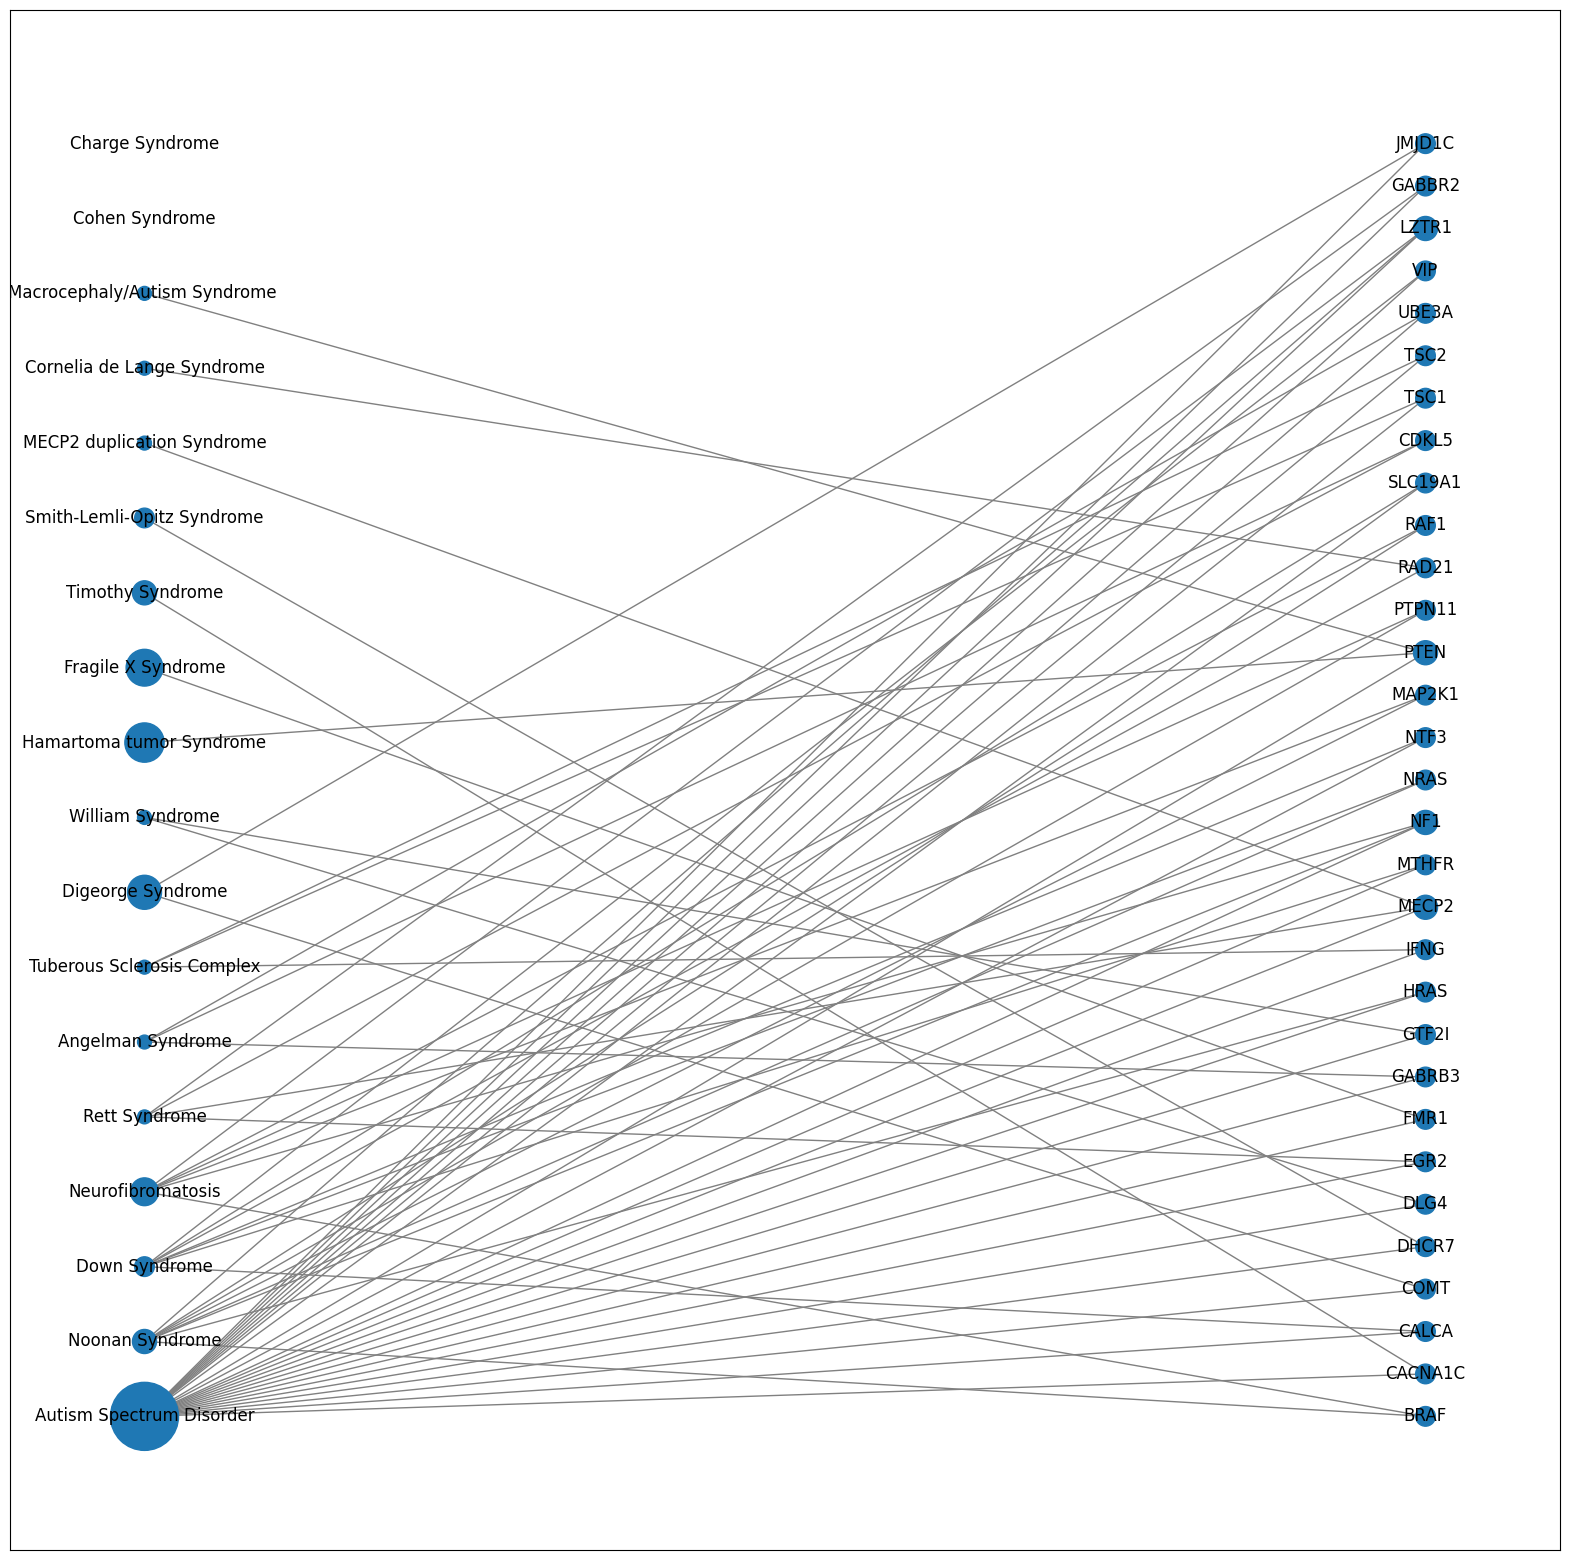

In [194]:
plt.figure(figsize=[20, 20])
nx.draw_networkx(G_focused, pos, 
                 arrows=True, edge_color='gray',
                 with_labels=True, labels=node_names, node_size=sizes,
                 font_size=12)
plt.show()

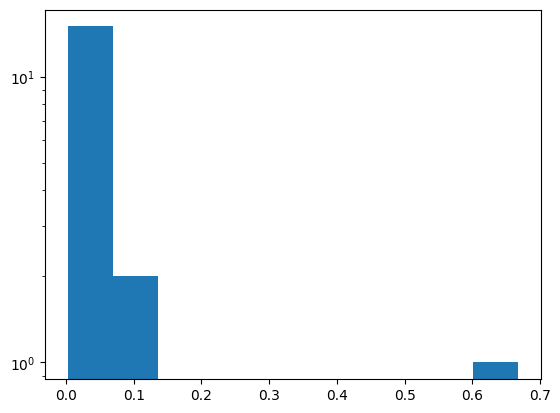

In [97]:
plt.yscale('log')
plt.hist([deg_cent for n, deg_cent in degree_cents.items() if n in disease_nodes])
plt.show()

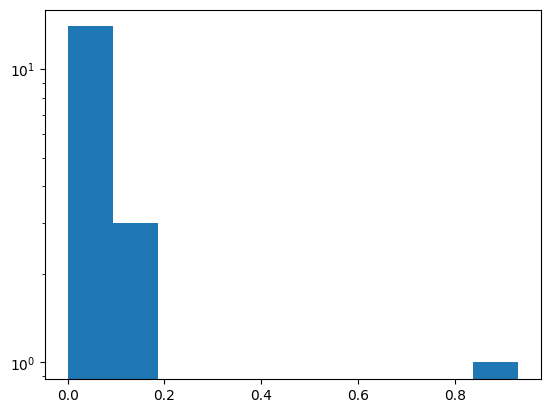

In [98]:
plt.yscale('log')
plt.hist([value for n, value in btw_cents.items() if n in disease_nodes])
plt.show()